# Importing Libraries

In [52]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Loading the dataset

In [53]:
iris = datasets.load_iris()  #loading iris dataset
data = pd.DataFrame(iris.data,columns = iris.feature_names)   #Converting data to a dataframe

target = iris.target_names  #storing target names
labels = iris.target  #storing target


In [54]:
data  #displaying data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Storing data and target

In [55]:
X = iris['data']   #storing features in X
y = iris['target']   #storing target in y
m, n = X.shape   #Taking shape of data matrix
k = 3   #number of clusters

<center> Defining the input </center>

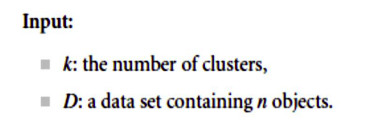

# Plotting the data points

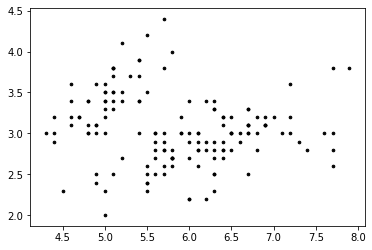

In [56]:
#plotting the initial data
plt.scatter(X[:, 0], X[:,1], s=7, color = 'black')

# Initialising the medoids

In [57]:
#Function is used to randomly initialise the medoids initially
def initialise_medoids(X,rseed,k):
    val = np.random.RandomState(rseed)  #Generating random number
    i = val.permutation(X.shape[0])[:k]   #Computing indices randomly
    medoids_initial = X[i]   #assigning the initial medoids
    return medoids_initial

medoids_initial = initialise_medoids(X,2, 3)   #calling the function

In [58]:
medoids_initial  #displaying initial medoids

array([[4.6, 3.4, 1.4, 0.3],
       [4.6, 3.1, 1.5, 0.2],
       [5.7, 2.5, 5. , 2. ]])

# Calculating distance of data points from medoids

In [59]:
def compute_distance(X, medoids):
    m = len(X)  #taking length of input data
    medoids_shape = medoids.shape  #taking shape of medoids
    
    #condition for reshaping the shape of medoids
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    
    #creating an empty array of dimensions m,k
    S = np.empty((m, k))
    
    #calculating squared distance of all datapoints from the computed medoids
    for i in range(m):
        dist = np.linalg.norm(X[i, :] - medoids, axis=1)
        S[i, :] = dist**2

    return S
  
S = compute_distance(X, medoids_initial)  #Calling the function


In [60]:
S

array([[2.700e-01, 4.200e-01, 1.756e+01],
       [2.600e-01, 1.100e-01, 1.709e+01],
       [7.000e-02, 6.000e-02, 1.842e+01],
       [1.100e-01, 0.000e+00, 1.706e+01],
       [2.100e-01, 4.200e-01, 1.790e+01],
       [9.900e-01, 1.360e+00, 1.550e+01],
       [0.000e+00, 1.100e-01, 1.787e+01],
       [1.800e-01, 2.500e-01, 1.679e+01],
       [3.000e-01, 9.000e-02, 1.805e+01],
       [2.300e-01, 1.000e-01, 1.686e+01],
       [7.500e-01, 1.000e+00, 1.702e+01],
       [9.000e-02, 1.400e-01, 1.642e+01],
       [2.400e-01, 7.000e-02, 1.763e+01],
       [3.800e-01, 2.700e-01, 2.103e+01],
       [1.850e+00, 2.340e+00, 1.994e+01],
       [2.230e+00, 2.940e+00, 1.842e+01],
       [9.100e-01, 1.360e+00, 1.830e+01],
       [2.600e-01, 4.300e-01, 1.721e+01],
       [1.460e+00, 1.750e+00, 1.547e+01],
       [4.200e-01, 7.500e-01, 1.719e+01],
       [7.400e-01, 7.700e-01, 1.503e+01],
       [3.600e-01, 6.500e-01, 1.661e+01],
       [2.100e-01, 5.000e-01, 2.166e+01],
       [3.900e-01, 4.200e-01, 1.41

# Assigning labels to data points 

In [61]:
#Assign labels to data points according to the minimum distance with the medoids
def assign_labels(S):
    return np.argmin(S, axis=1)
  
labels = assign_labels(S)  #calling function

# Updating medoids 

In [62]:
#function to update the medoids
def update_medoids(X, medoids):
    
    S = compute_distance(X, medoids)  #computing distance
    labels = assign_labels(S)   #assigning labels
        
    out_medoids = medoids
                
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_distance(X, medoids[i]))  #calculating the average dissimilarity by summing over all the distances

        cluster_points = X[labels == i]  #Assigning cluster points
        
        for datap in cluster_points:  #checking for a data point in the cluster points
            new_medoid = datap
            new_dissimilarity= np.sum(compute_distance(X, datap))  #calculating the new dissimilarity
            
            #condition to update the value of average dissimilarity
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
    return out_medoids

# Setting condition for convergence

In [63]:
#function to set the condition for convergence by comparing the values of old medoids and new medoids
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

<center> Algorithm for computing k medoids </center>

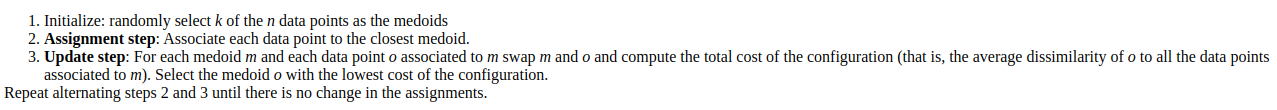

# k medoids procedure

In [64]:
#function to compute k medoids
def kmedoids(X, k, starting_medoids=None, max_steps=np.inf):
    
    #condition for setting the initial values of medoids
    if starting_medoids is None:
        medoids = initialise_medoids(X,2, k)
    else:
        medoids = starting_medoids
    
    #setting the converged variable initially to false
    converged = False
    labels = np.zeros(len(X))
    i = 1
    
    #loop the till the condition of convergence is not met
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()  #copying old medoids
        
        S = compute_distance(X, medoids)  #computing distance 
        
        labels = assign_labels(S)  #assigning labels
        
        medoids = update_medoids(X, medoids)   #updating medoids
        
        converged = has_converged(old_medoids, medoids)  #getting the value of converged
        i += 1
    return (medoids,labels)

#getting the results
results = kmedoids(X, 3)
final_medoids = results[0]
data['clusters'] = results[1]


In [65]:
results

(array([[5.1, 3.8, 1.9, 0.4],
        [5.1, 2.5, 3. , 1.1],
        [5.6, 2.9, 3.6, 1.3]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

# Plotting final results

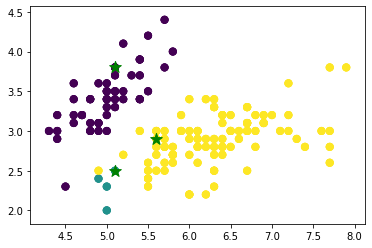

In [66]:
centers, labels = kmedoids(X, 3)
legends = ['cluster1','cluster2','cluster3']

#plotting the results
for i in range(3):
    plt.scatter(X[:, 0], X[:, 1], c=labels,label = legends[i],
            s=50, cmap='viridis');
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g',label = 'Centroids', s=150)
